# The "Hello World" of Deep learning: MNIST Digits
### DS4400: Machine Learning
### Lab 19: Introduction to Keras

In [257]:
# The MNIST (Modified National Institute of Standards and Technology) database is a large 
# collection of hand-written digits included with the keras library

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [258]:
train_images.shape

(60000, 28, 28)

In [259]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [260]:
test_images.shape

(10000, 28, 28)

In [261]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [262]:
# Let's look at one of the images
first = train_images[0]
first

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

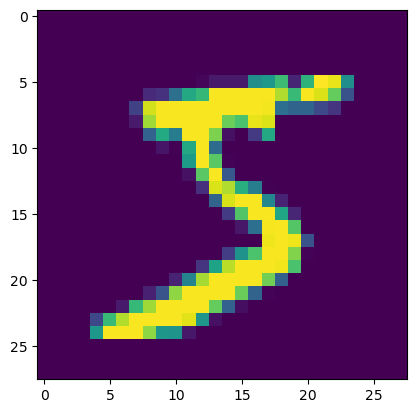

In [263]:
import matplotlib.pyplot as plt
plt.imshow(first, cmap='Greys')
plt.imshow(first)

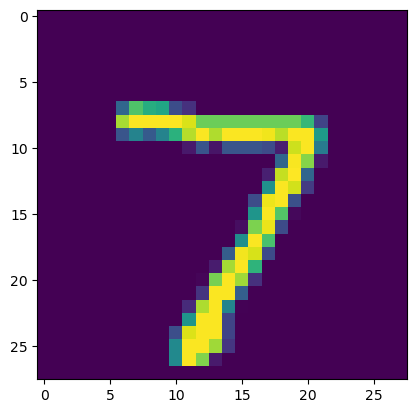

In [264]:
# The first test image is a 7.   (Remember that)
plt.imshow(test_images[0])

In [265]:
# Image normalization and re-shaping
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

train_images.shape


(60000, 784)

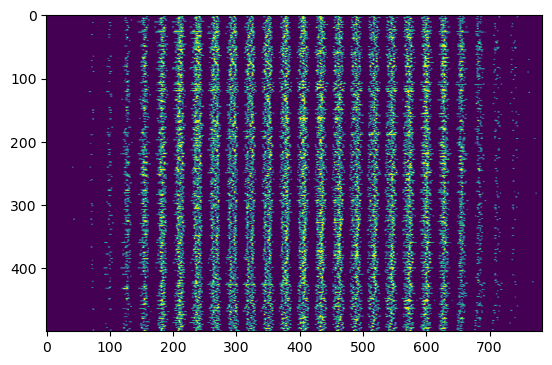

In [266]:
# Lets look at the first 500 images
plt.imshow(train_images[0:500])

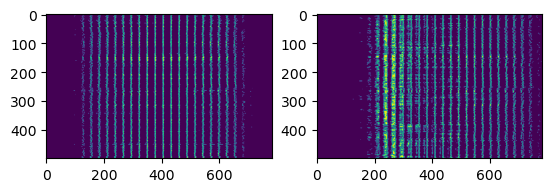

In [267]:
# Let's compare images for "1" with images for "7"
import numpy as np
digit1 = train_images[np.where(train_labels==1)]
digit2 = train_images[np.where(train_labels==7)]

fig, axs = plt.subplots(1,2)
axs[0].imshow(digit1[:500])
axs[1].imshow(digit2[:500])

In [268]:
# Architecture: Building the network as a sequence of two layers
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),    # Inner layer uses ReLU
    layers.Dense(10, activation="softmax")   # output probability
])

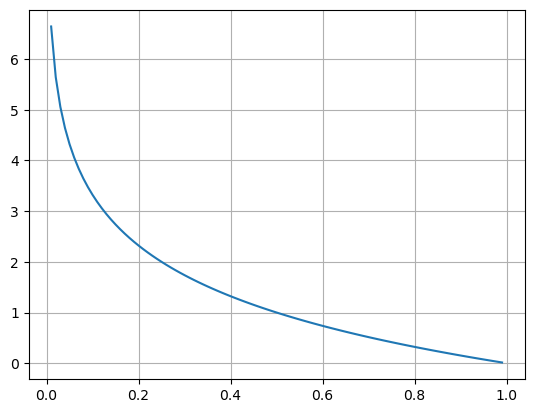

In [269]:
# Sidebar on cross-entropy
# Suppose A = [0.50, 0.50]
# Suppose B = [p, (1-p)]
# What is H(A,B)?
from math import log2

def cross_entropy(p, q):
    return -sum([p[i] * log2(q[i]) for i in range(len(p))])

A = [0, 1]     

Hs = []

P = np.arange(0.01, 1, 0.01)
for p in P:
    B = [1-p, p]   
    H = cross_entropy(A,B)
    Hs.append(H)

plt.plot(P, Hs)
plt.grid()


In [270]:
# Model compilation

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [278]:
# Fit the model.   Note that 60,000 / 128 = 468.75 ==> 469 Gradient Descent Updates

epochs = 10
batch_size=128
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                   validation_data = (test_images, test_labels))


Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0243 - accuracy: 0.9930 - val_loss: 0.0596 - val_accuracy: 0.9814
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0185 - accuracy: 0.9949 - val_loss: 0.0660 - val_accuracy: 0.9815
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0138 - accuracy: 0.9965 - val_loss: 0.0565 - val_accuracy: 0.9830
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0100 - accuracy: 0.9973 - val_loss: 0.0620 - val_accuracy: 0.9828
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0074 - accuracy: 0.9985 - val_loss: 0.0653 - val_accuracy: 0.9813
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0060 - accuracy: 0.9987 - val_loss: 0.0646 - val_accuracy: 0.9819
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0617 - val_accuracy: 0.9841
Epoch 

In [272]:
# Make Predictions
test0 = test_images[:1] # Get the first test image (as a 2D array)
test0

prediction0 = model.predict(test0)

prediction0

1/1 [==============================] - 0s 48ms/step


array([[8.0239829e-07, 4.5590465e-08, 1.0148147e-05, 2.8599196e-04,
        6.4280983e-11, 2.8232316e-07, 1.3422470e-11, 9.9965203e-01,
        9.4288106e-07, 4.9749880e-05]], dtype=float32)

In [273]:
prediction0.argmax()

7

In [274]:
test_labels[0]

7

In [275]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Loss    : ", round(test_loss, 4))
print("Accuracy: ", round(test_acc, 4))

313/313 [==============================] - 0s 1ms/step - loss: 0.0637 - accuracy: 0.9799
Loss    :  0.0637
Accuracy:  0.9799


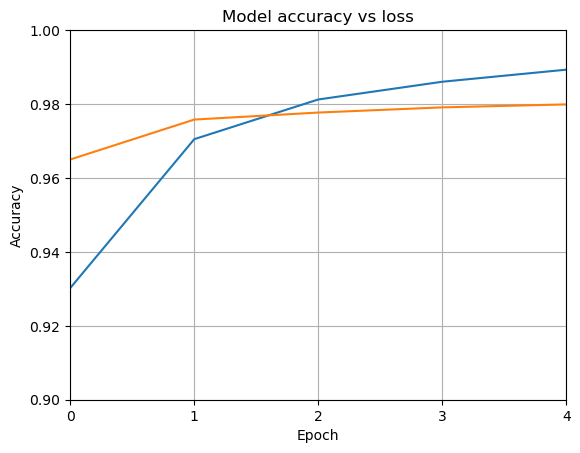

In [277]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.title('Model accuracy vs loss')


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xlim(0,epochs-1)
plt.xticks(range(epochs))
plt.ylim(0.9,1)
plt.grid()

plt.show()